In [25]:
# ============= SET-UP =====================
# --- Standard library ---
import sys  # System pathing
from copy import deepcopy

# --- Scientific ---
import numpy as np  # General computational tools
from sklearn import metrics, decomposition  # Measuring classifier performance
from scipy.special import comb

# --- Network science ---
import networkx as nx  # General network tools
from node2vec import Node2Vec as N2V  # Embedding tools

# --- Project source code ---
sys.path.append("../src/")
from Utils import *  # Custom synthetic benchmarks
from glee import eigenmaps

# --- Data handling and visualization ---
import matplotlib.pyplot as plt

# --- Miscellaneous ---
accuracy = metrics.accuracy_score
auroc = metrics.roc_auc_score
PCA = decomposition.PCA

In [26]:
N = 100  # Number of active nodes in each layer, 1/2 total nodes!
dimensions = 128

# Form true layers
alpha = nx.complete_graph(N)
alpha.add_nodes_from(range(N, 2*N))

beta = nx.complete_graph(range(N, 2*N))
beta.add_nodes_from(range(N))

In [27]:
embedding = "glee"

if embedding == "glee":
    E_alpha = eigenmaps(alpha, dimensions, method='glee', return_vals=False)
    E_beta = eigenmaps(beta, dimensions, method='glee', return_vals=False)
elif embedding == "n2v":
    E_alpha = N2V(alpha, dimensions=dimensions, walk_length=30, num_walks=200, workers=4, quiet=True).fit(window=10, min_count=1, batch_words=4).wv.vectors
    E_beta = N2V(beta, dimensions=dimensions, walk_length=30, num_walks=200, workers=4, quiet=True).fit(window=10, min_count=1, batch_words=4).wv.vectors

In [28]:
pca = PCA(n_components=2)
E_alpha = pca.fit_transform(E_alpha)

pca = PCA(n_components=2)
E_beta = pca.fit_transform(E_beta)

Text(0.5, 1.0, "'Big' Picture")

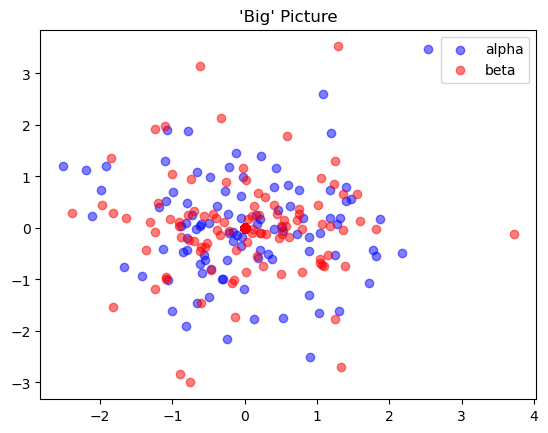

In [29]:
plt.figure()
plt.scatter(
    x=[v[0] for v in E_alpha],
    y=[v[1] for v in E_alpha],
    color="blue",
    label="alpha",
    alpha=0.5
)
plt.scatter(
    x=[v[0] for v in E_beta],
    y=[v[1] for v in E_beta],
    color="red",
    label="beta",
    alpha=0.5
)
plt.legend()
plt.title("'Big' Picture")

Text(0.5, 1.0, 'Test set with beta ground truth\nDifference vectors')

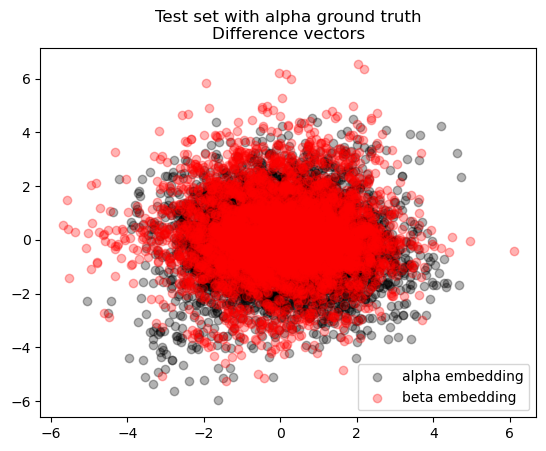

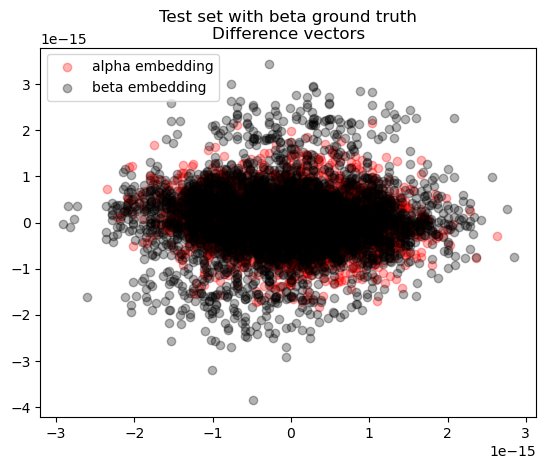

In [30]:
edges_gt_alpha = list(alpha.edges())
edges_gt_beta = list(beta.edges())


# Test edges that belong to alpha
plt.figure()
plt.scatter(
    x=[E_alpha[i][0] - E_alpha[j][0] for (i,j) in edges_gt_alpha],
    y=[E_alpha[i][1] - E_alpha[j][1] for (i,j) in edges_gt_alpha],
    color="black",
    label="alpha embedding",
    alpha=0.3
)
plt.scatter(
    x=[E_beta[i][0] - E_beta[j][0] for (i,j) in edges_gt_alpha],
    y=[E_beta[i][1] - E_beta[j][1] for (i,j) in edges_gt_alpha],
    color="red",
    label="beta embedding",
    alpha=0.3
)

plt.legend()
plt.title("Test set with alpha ground truth\nDifference vectors")


# ----------------


# Test edges that belong to alpha
plt.figure()
plt.scatter(
    x=[E_alpha[i][0] - E_alpha[j][0] for (i,j) in edges_gt_beta],
    y=[E_alpha[i][1] - E_alpha[j][1] for (i,j) in edges_gt_beta],
    color="red",
    label="alpha embedding",
    alpha=0.3
)
plt.scatter(
    x=[E_beta[i][0] - E_beta[j][0] for (i,j) in edges_gt_beta],
    y=[E_beta[i][1] - E_beta[j][1] for (i,j) in edges_gt_beta],
    color="black",
    label="beta embedding",
    alpha=0.3
)

plt.legend()
plt.title("Test set with beta ground truth\nDifference vectors")


Text(0.5, 1.0, 'Test set with beta embedding\nDifference vectors')

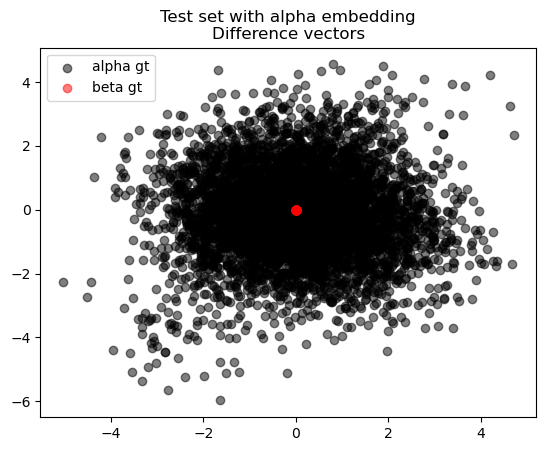

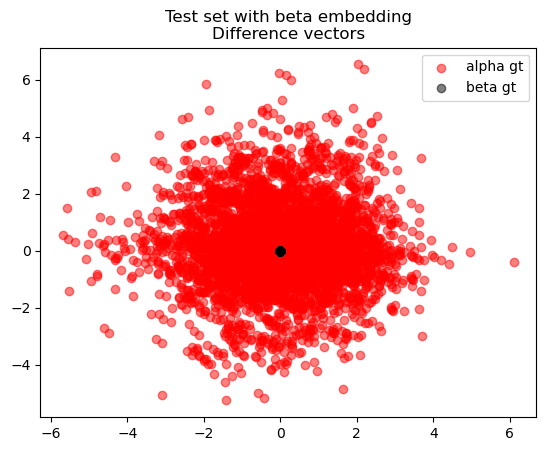

In [31]:
# Test edges under alpha embedding
plt.figure()
plt.scatter(
    x=[E_alpha[i][0] - E_alpha[j][0] for (i,j) in edges_gt_alpha],
    y=[E_alpha[i][1] - E_alpha[j][1] for (i,j) in edges_gt_alpha],
    color="black",
    label="alpha gt",
    alpha=0.5
)
plt.scatter(
    x=[E_alpha[i][0] - E_alpha[j][0] for (i,j) in edges_gt_beta],
    y=[E_alpha[i][1] - E_alpha[j][1] for (i,j) in edges_gt_beta],
    color="red",
    label="beta gt",
    alpha=0.5
)

plt.legend()
plt.title("Test set with alpha embedding\nDifference vectors")


# ----------------


# Test edges under beta embedding
plt.figure()
plt.scatter(
    x=[E_beta[i][0] - E_beta[j][0] for (i,j) in edges_gt_alpha],
    y=[E_beta[i][1] - E_beta[j][1] for (i,j) in edges_gt_alpha],
    color="red",
    label="alpha gt",
    alpha=0.5
)
plt.scatter(
    x=[E_beta[i][0] - E_beta[j][0] for (i,j) in edges_gt_beta],
    y=[E_beta[i][1] - E_beta[j][1] for (i,j) in edges_gt_beta],
    color="black",
    label="beta gt",
    alpha=0.5
)

plt.legend()
plt.title("Test set with beta embedding\nDifference vectors")